##### 

##### Labor laws in Erewhon require factory owners to give evry worker a holiday whenever one of them has a birthday and to hire without discrimination on grounds of birthdays. Except for these holidays they work 365 days a year. The owners want to maximize the expected total number of man-days worked per year in a factory. How many workers do factories have in Erewhon?

##### Let's start by demonstrating the result analytically: the expected number of man-days is given by: 
##### $$ N_w\times 365 \times\bigg(\frac{364}{365}\bigg)^{N_w} $$ where $N_w$ is the number of workers and $(364/365)^{N_w}$ is the probability of one given day being a workday given $N_w$ workers. We want to maximize this function of $N_w$. One can equal the derivative wrt $N_w$ to zero and find:
##### $$ N_w\approx 364$$
##### Now let's solve this with a monte-carlo approach.

In [165]:
# Let's simulate the different scenarios with n workers, with n between 1 and 500
# and extract the mean number of worked man-days in a year

import numpy as np
import matplotlib.pyplot as plt

def compute_mean_man_days(n_workers, n_simulations):
    birthdays = np.random.randint(1, 366, (n_simulations, n_workers))
    # compute the number of unique birthdays in each simulation
    days_off = np.zeros(n_simulations)
    for i in range(n_simulations):
        days_off[i] = len(np.unique(birthdays[i,:]))
    return n_workers * (365-np.mean(days_off))

n_simulations = 1000

mean_man_days = np.array([])
for n_workers in range(1, 501):
    mean_man_days = np.append(mean_man_days,compute_mean_man_days(n_workers, n_simulations))
    

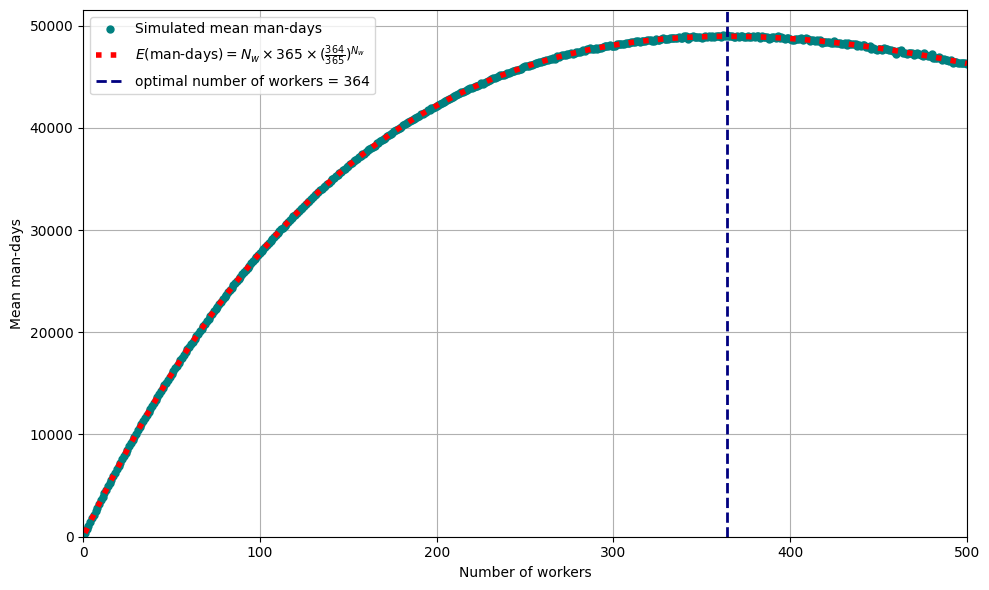

In [166]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
workers = np.arange(1, 501)

# plot mean man-days as function of n_workers
axs.plot(workers, mean_man_days, 'o', label='Simulated mean man-days', markersize=5, color='teal')
axs.plot(workers, workers*365*(364/365)**workers, ':', linewidth=4, label=r'$E($man-days$)=N_w\times 365 \times (\frac{364}{365})^{N_w}$', color='red')
axs.axvline(x=np.argmax(workers*365*(364/365)**workers), color='navy', linestyle='--', linewidth=2, label='optimal number of workers = {}'.format(np.argmax(workers*365*(364/365)**workers)))
axs.set_xlabel('Number of workers')
axs.set_ylabel('Mean man-days')
axs.legend(loc='upper left')
axs.set_xlim(0, 500)
axs.set_ylim(0, )
axs.grid()
plt.tight_layout()
plt.show()